# Case Study: Neuro

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

## Velocity Estimation for Sample Genes

In [2]:
%autoreload 2

raw_path="/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv"
raw_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/DentateGyrus.csv'
raw_path='/Users/chen.weiqing/code/celldancer/DentateGyrus.csv'
load_raw_data=pd.read_csv(raw_path)

In [3]:
%autoreload 2

max_epoches=200
check_n_epoch=5
#5 10 15
learning_rate=0.001
downsample_method='neighbors'
step_i=200
step_j=200
sampling_ratio=0.1
n_neighbors=30
optimizer='Adam'
n_neighbors_downsample=30
auto_downsample=True
auto_norm_u_s=False
cost_type='smooth'
average_cost_window_size=1
smooth_weight=0.9
patience=3
#3 5 7
binning=False

gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx','Prkcg','Pygb','Scn2a1',\
            'Tbc1d16','Slc1a3','Syt11']


#gene_list=list(load_raw_data.gene_name.drop_duplicates())
#result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/neuro/velocity_result/tunning_train'
#result_path=None

folder_name=("epoch"+str(max_epoches)+"check_n"+str(check_n_epoch)+"Lr"+str(learning_rate)+"Down"+str(downsample_method)+"_"+str(step_i)+"_"+str(step_j)+"Ratio"+str(sampling_ratio)+"N"+str(n_neighbors)+"O"+str(optimizer)+"nD"+str(n_neighbors_downsample)+"autoD"+str(auto_downsample)+"autoN"+str(auto_norm_u_s)+"costT"+str(cost_type)+"smoW"+str(smooth_weight)+"p"+str(patience)+"bin"+str(binning))

result_path = '/Users/chen.weiqing/code/celldancer/neuron/velocity_result/result_detailcsv/tunning_train/'+folder_name+'/'

if not os.path.isdir(result_path):
    os.mkdir(result_path)

# Velocity Estimation
brief, load_cellDancer=velocity_estimation.train(load_raw_data,\
                                                 gene_choice=gene_list,\
                                                 max_epoches=max_epoches,\
                                                 check_n_epoch=check_n_epoch,\
                                                 learning_rate=learning_rate, \
                                                 downsample_method=downsample_method,\
                                                 step_i=step_i,\
                                                 step_j=step_j,\
                                                 sampling_ratio=sampling_ratio,\
                                                 n_neighbors=n_neighbors,\
                                                 optimizer=optimizer,\
                                                 n_neighbors_downsample=n_neighbors_downsample,\
                                                 auto_downsample=auto_downsample,\
                                                 auto_norm_u_s=auto_norm_u_s,\
                                                 cost_type=cost_type,\
                                                 smooth_weight=smooth_weight,\
                                                 average_cost_window_size=average_cost_window_size,\
                                                 patience=patience,\
                                                 binning=binning,\
                                                 result_path=result_path,n_jobs=5)

Using /Users/chen.weiqing/code/celldancer/neuron/velocity_result/result_detailcsv/tunning_train/epoch200check_n5Lr0.001Downneighbors_200_200Ratio0.1N30OAdamnD30autoDTrueautoNFalsecostTsmoothsmoW0.9p3binFalse/cell_dancer_velocity_2022-05-16 22-26-35 as the output path.


Velocity Estimation: 100%|████████████████████████████████████████████████████████████| 1/1 [00:36<00:00, 36.88s/it]


## Sample Genes' Velocity Plot

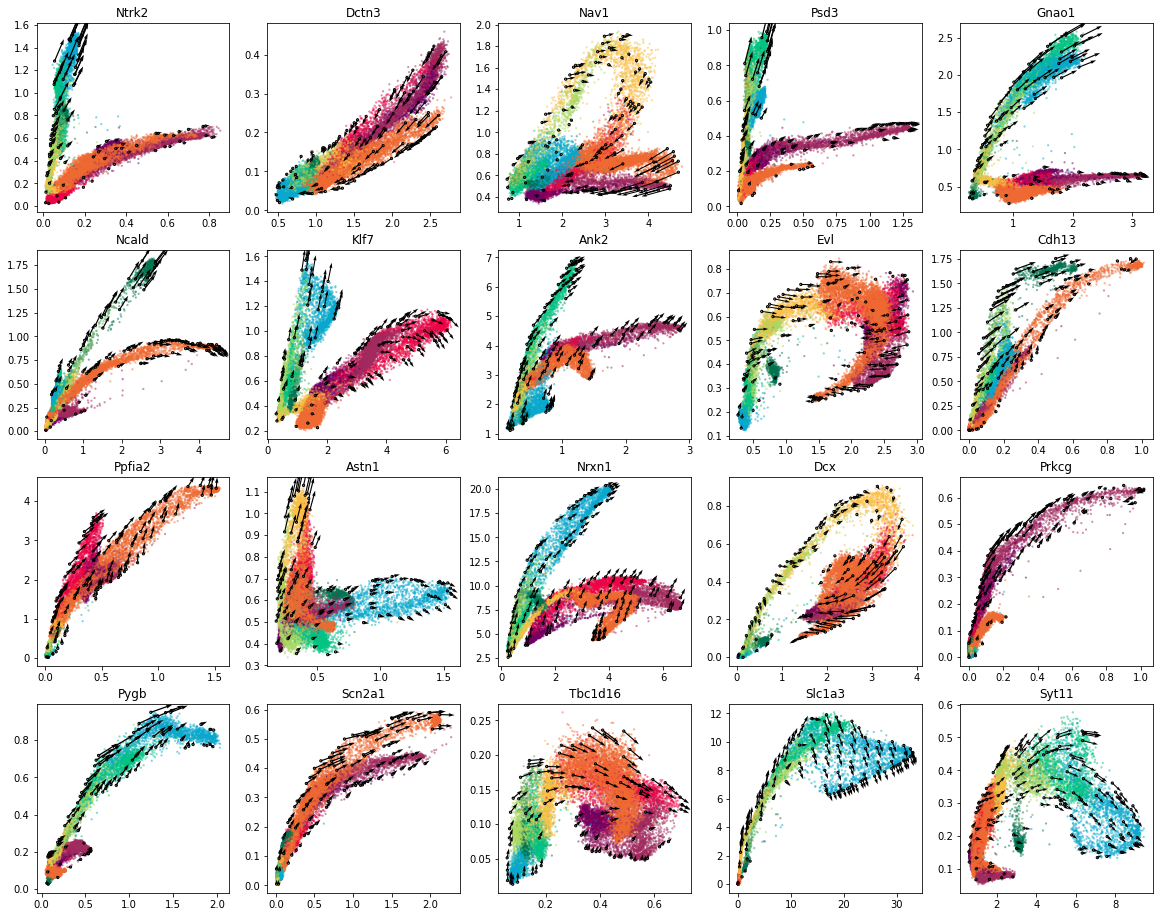

In [4]:
ncols=5

height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))
# fig = plt.figure(figsize=(20,20))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])

plt.show()

## Load velocity estimation result of 2000 genes

In [4]:
#detail_file = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv'
detail_file = '/Users/chen.weiqing/code/celldancer/epoch200check_n10Lr0/epoch200check_n10Lr0.001Downneighbors_200_200Ratio0.1N30OAdamnD30autoDTrueautoNFalsecostTsmoothsmoW0.9p3binFalse/cell_dancer_velocity_2022-05-10 16-23-03/celldancer_estimation.csv'
load_cellDancer=pd.read_csv(detail_file)
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Stom,0.006305,0.000000,0.006294,9.720251e-07,0.000002,0.950645,0.003459,0.068938,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429
1,1,Stom,0.006305,0.000000,0.006294,9.720251e-07,0.000002,0.950645,0.003459,0.068938,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895
2,2,Stom,0.008353,0.000000,0.008339,9.627479e-07,0.000002,0.950773,0.003450,0.068938,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419
3,3,Stom,0.000000,0.000000,0.000000,1.001259e-06,0.000002,0.950247,0.003490,0.068938,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485
4,4,Stom,0.000000,0.000000,0.000000,1.001259e-06,0.000002,0.950247,0.003490,0.068938,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39164255,18135,Prmt8,0.262922,0.131071,0.271746,1.342865e-01,0.087709,0.620109,0.242017,0.106441,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668
39164256,18136,Prmt8,0.531809,0.198949,0.526562,1.979609e-01,0.119918,0.612693,0.248939,0.106441,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788
39164257,18137,Prmt8,0.212177,0.173362,0.240036,1.742237e-01,0.108185,0.614097,0.239156,0.106441,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364
39164258,18138,Prmt8,0.338159,0.216978,0.363328,2.152727e-01,0.128825,0.609446,0.242193,0.106441,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549


## Compute Cell Velocity

In [5]:
%autoreload 2


# Set Parameters
n_neighbors=200
downsample_step=(60,60)
mode='embedding'
transfer_mode=None

# Compute Cell Velocity
gene_choice=list(set(load_cellDancer.gene_name))
load_cellDancer=compute_cell_velocity(load_cellDancer=load_cellDancer,
            #  gene_list=gene_l,
              mode=mode,
              transfer_mode=transfer_mode,
              n_neighbors=n_neighbors,
              step=downsample_step)

(genes, cells): (2156, 18140)
After downsampling, there are  888 cells.


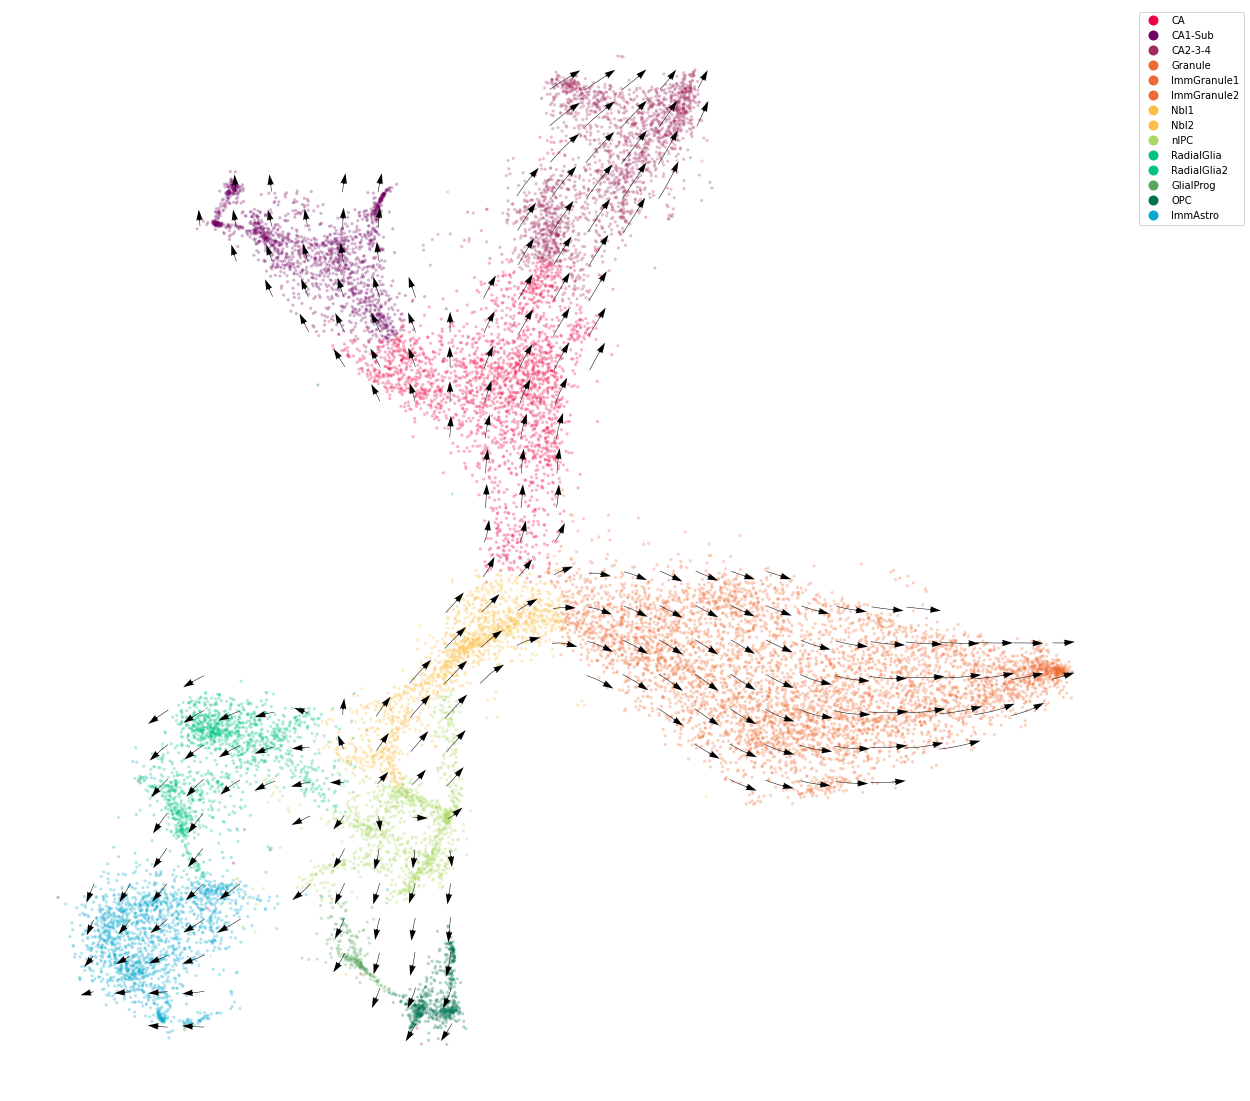

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
---------------------------------------------

In [6]:
# Plot Cell Velocity
# Set Parameters
min_mass=2
grid_steps=(30,30)
alpha_inside=0.3


fig, ax = plt.subplots(figsize=(20,20))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_neuro, alpha=alpha_inside, s=10,
             velocity=True, legend='on',min_mass=min_mass,grid_steps=grid_steps)
ax.axis('off')
plt.savefig('/Users/chen.weiqing/code/celldancer/neuron/velocity_result/result_detailcsv/tunning_train/'+folder_name+'.pdf')
plt.show()

## Estimate Pseudotime

In [8]:
%%capture

# Estimate Pseudotime
cell_time = dict()
dt = 0.001
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (30,30)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], n_repeats=n_repeats, downsample_step=downsample_step, path_similarity=0.15)

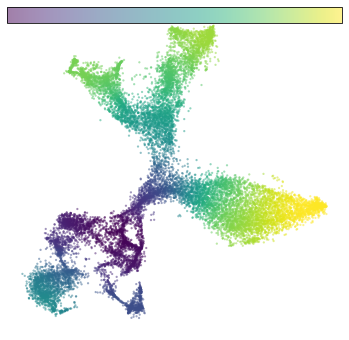

In [9]:
## Plot Pseudotime
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             velocity=False)
ax.axis('off')
plt.show()

## Gene Pseudotime

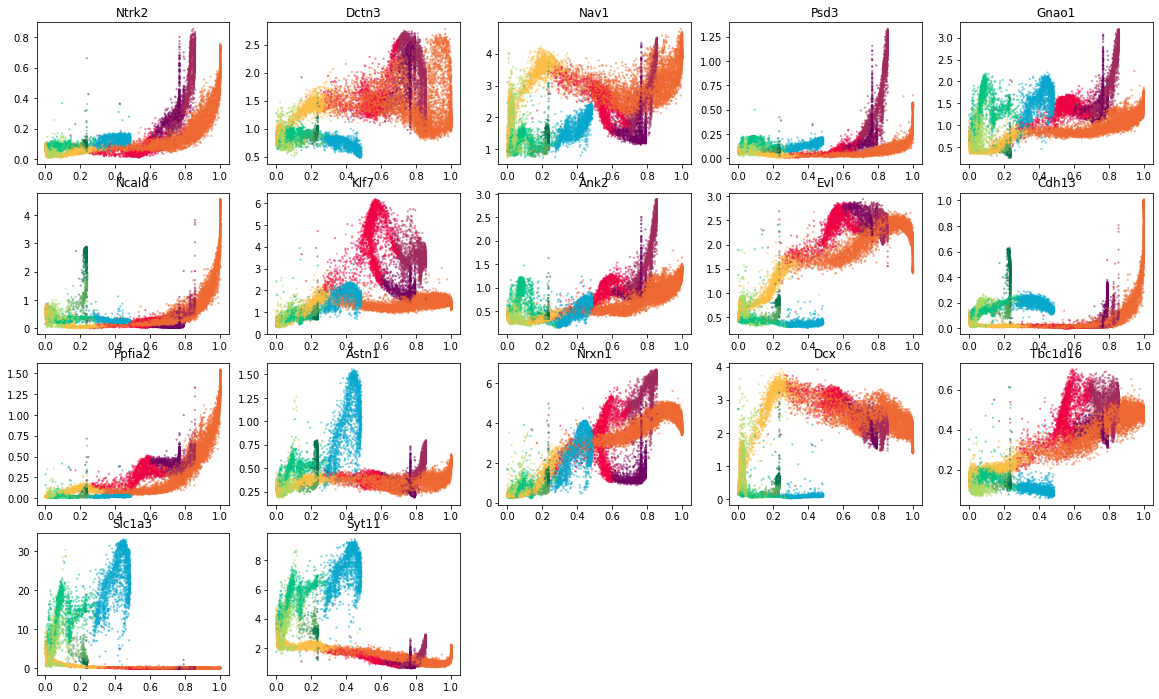

In [10]:
gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx',\
            'Tbc1d16','Slc1a3','Syt11']

ncols=5
fig = plt.figure(figsize=(20,12))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    # ax.axis('off')

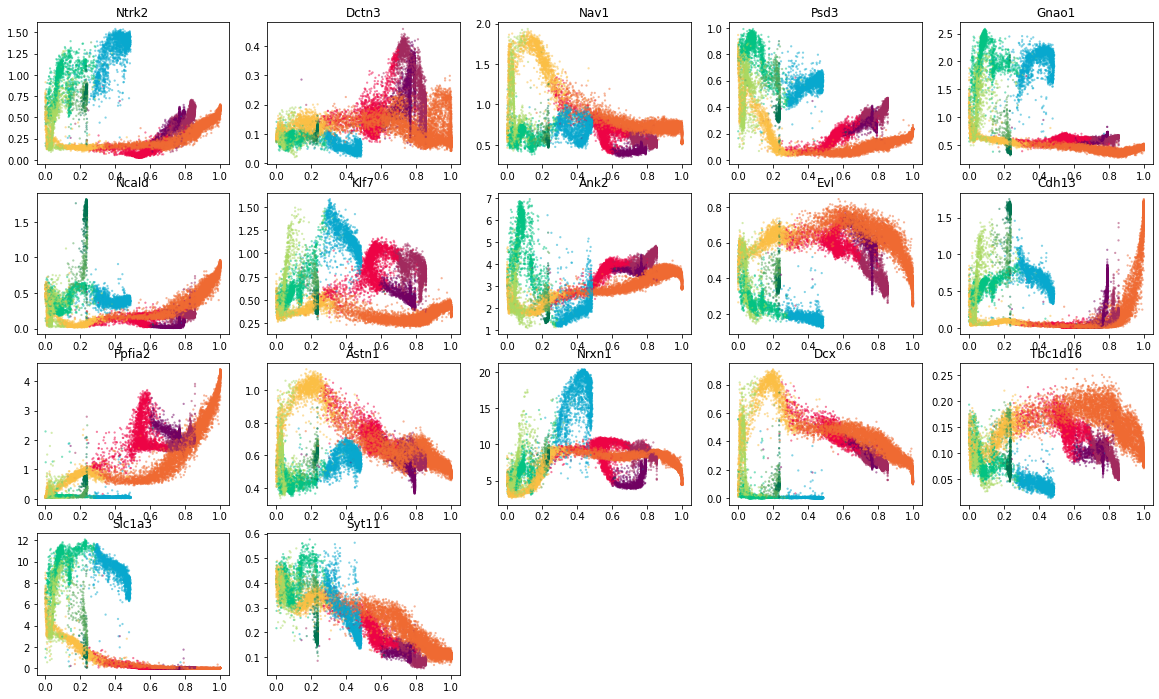

In [11]:
gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx',\
            'Tbc1d16','Slc1a3','Syt11']

ncols=5
fig = plt.figure(figsize=(20,12))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    # ax.axis('off')

## Gene Parameter in Cell Level

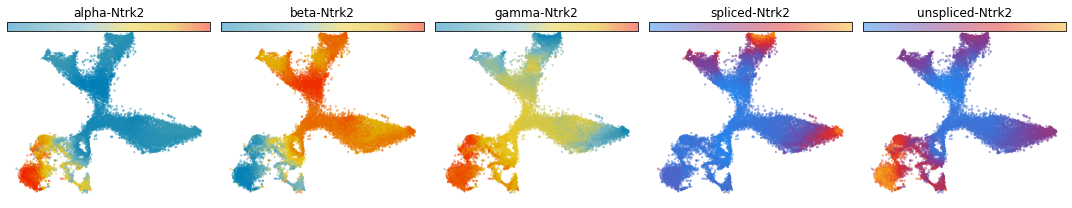

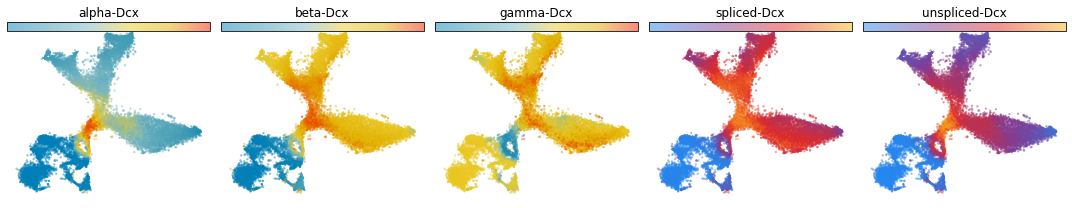

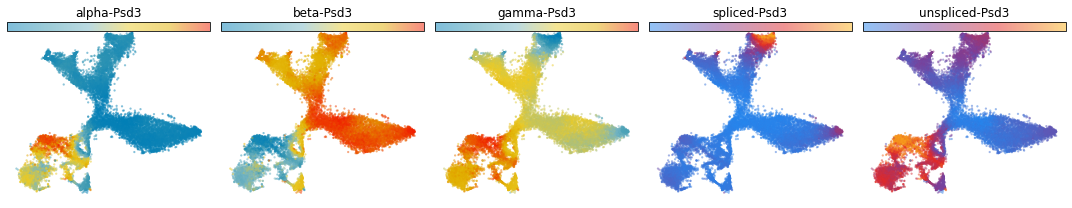

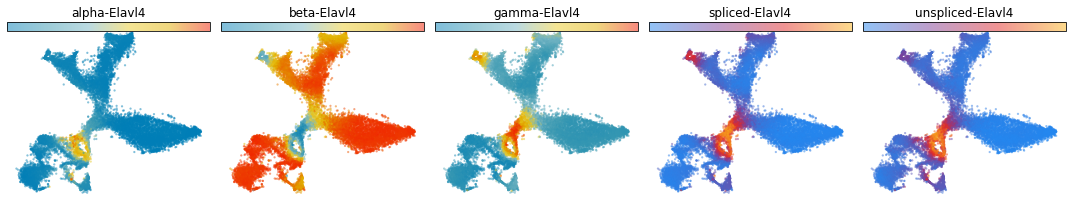

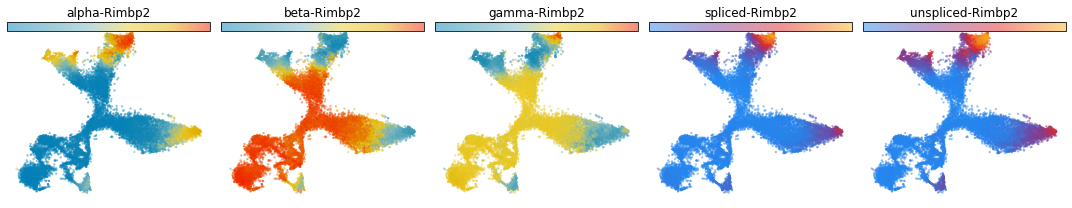

In [12]:
gene_samples=['Ntrk2','Dcx','Psd3','Elavl4','Rimbp2']
for gene in gene_samples:
    fig, ax = plt.subplots(ncols=5, figsize=(15,3))
    cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
                 gene_name=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
                 gene_name=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
                 gene_name=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[3],load_cellDancer, colors='spliced', 
                 gene_name=gene, velocity=False)
    cdplt.cell.scatter_cell(ax[4],load_cellDancer, colors='unspliced', 
                 gene_name=gene, velocity=False)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')
    ax[3].axis('off')
    ax[4].axis('off')
    ax[0].set_title('alpha-'+gene)
    ax[1].set_title('beta-'+gene)
    ax[2].set_title('gamma-'+gene)
    ax[3].set_title('spliced-'+gene)
    ax[4].set_title('unspliced-'+gene)
    plt.tight_layout()
    plt.show()

# Gene Velocity by Cost Rank

## UMAP using alpha, beta, and gamma

In [13]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'alpha')
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'beta')
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'gamma')
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'alpha_beta_gamma')

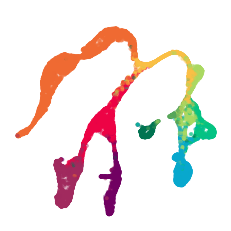

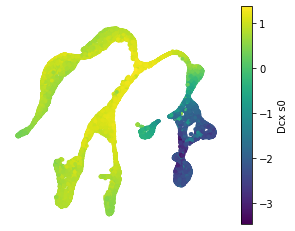

In [14]:
cdplt.cell.plot_para_umap('alpha',load_cellDancer,cluster_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_para_umap('alpha',load_cellDancer,gene_name='Dcx',cluster_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)

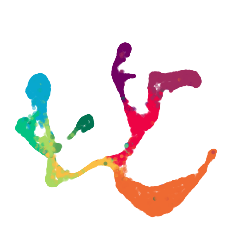

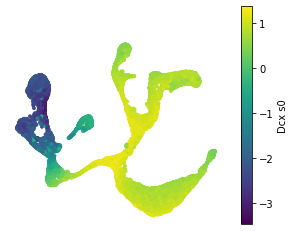

In [15]:
cdplt.cell.plot_para_umap('beta',load_cellDancer,cluster_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_para_umap('beta',load_cellDancer,gene_name='Dcx',cluster_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)

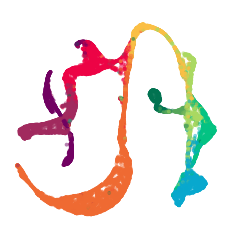

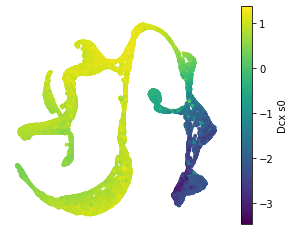

In [16]:
cdplt.cell.plot_para_umap('gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_para_umap('gamma',load_cellDancer,gene_name='Dcx',cluster_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)

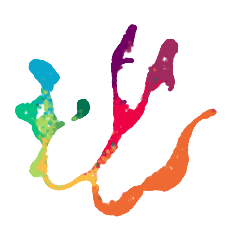

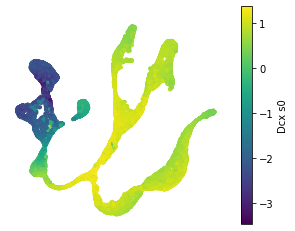

In [17]:
cdplt.cell.plot_para_umap('alpha_beta_gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)
cdplt.cell.plot_para_umap('alpha_beta_gamma',load_cellDancer,gene_name='Dcx',cluster_map=cdplt.colormap.colormap_neuro ,save_path=None,title=None)